In [21]:
# Import needed libraries 

import pandas as pd 
import os
from datetime import timedelta
import numpy as np 
from scipy.signal import argrelextrema
import alpaca_trade_api as tradeapi 
import matplotlib.pyplot as plt 
import matplotlib.dates as mpdates
from mplfinance.original_flavor import candlestick_ohlc
from dotenv import load_dotenv
from itertools import islice

In [22]:
# Load .env file

load_dotenv()

True

In [23]:
# Set Alpaca API key and secret passwords

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [24]:
# Initiate REST API

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [25]:
# Parameters for Stock Data from Alpacas
# Establish time frame (5 minute)

time_frame = "5min"

# Identify what stock symbol is trading

stock_symbol = "QQQ"

# Identify what start date to begin data analysis
# JAN 27 27 2021 GameStop event (GME) are we still doing this?

start_date = pd.Timestamp("2021-02-03", tz="America/New_York").isoformat()

# Identify what end date to finalize data analysis

end_date = pd.Timestamp("2021-02-04", tz="America/New_York").isoformat()

In [26]:
# # Call stock data from identified period of time

# stock_data = api.get_bars(
#     stock_symbol, 
#     time_frame, 
#     start = start_date, 
#     end = end_date
# ).df

In [27]:
# Function to call daily stock data

def get_stock_data(api, stock_symbol, time_frame, start_date, end_date):
    
    # Assuming api.get_bars returns a DataFrame with a 'df' attribute
    
    stock_data = api.get_bars(
        stock_symbol, 
        time_frame, 
        start=start_date, 
        end=end_date
        ).df
    return stock_data

stock_data = get_stock_data(api, stock_symbol, time_frame, start_date, end_date)

# Displays the information pulled for working through code

stock_data.info()
display(stock_data.head())
display(stock_data.tail())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 2021-02-03 09:00:00+00:00 to 2021-02-04 00:55:00+00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        192 non-null    float64
 1   high         192 non-null    float64
 2   low          192 non-null    float64
 3   trade_count  192 non-null    int64  
 4   open         192 non-null    float64
 5   volume       192 non-null    int64  
 6   vwap         192 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 12.0 KB


,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2021-02-03 09:00:00+00:00,330.24,330.33,330.11,39,330.11,3383,330.227245
2021-02-03 09:05:00+00:00,329.92,330.22,329.88,38,330.22,5358,330.052469
2021-02-03 09:10:00+00:00,329.99,330.07,329.95,15,329.97,2615,329.999281
2021-02-03 09:15:00+00:00,329.91,329.91,329.75,20,329.89,1424,329.869747
2021-02-03 09:20:00+00:00,329.83,329.89,329.71,28,329.87,2871,329.788189


,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2021-02-04 00:35:00+00:00,327.5200,327.56,327.46,36,327.55,9098,327.534268
2021-02-04 00:40:00+00:00,327.3900,327.44,327.39,33,327.43,6710,327.416061
2021-02-04 00:45:00+00:00,327.1100,327.42,327.11,65,327.42,10851,327.195534
2021-02-04 00:50:00+00:00,327.0499,327.20,327.03,112,327.12,35129,327.103756
2021-02-04 00:55:00+00:00,327.1000,327.11,327.07,44,327.10,10591,327.097768


In [28]:
# # Plot the stock data and identified minima

# plt.figure(figsize=(15, 5))

# # Identify degree of polynomial, this can be adjuster at a later date if needed

# polynomial_degree = 75

# # Establishes dimensions for x-axis

# min_length = min(len(stock_data.index), len(stock_data['close']))
# plt.plot(stock_data.index, stock_data["close"], label='Close Prices', alpha=0.7)

# # ***Polynomial Fit***
# # Establish the x-axis

# x_data = np.arange(min_length)

# # Calculate the polynomial coefficients to fit the stock data (OHLC)

# polynomial_coefficients_open = np.polyfit(x_data, stock_data['open'][:min_length], polynomial_degree)
# polynomial_coefficients_high = np.polyfit(x_data, stock_data['high'][:min_length], polynomial_degree)
# polynomial_coefficients_low = np.polyfit(x_data, stock_data['low'][:min_length], polynomial_degree)
# polynomial_coefficients_close = np.polyfit(x_data, stock_data['close'][:min_length], polynomial_degree)

# # Evaluate the polynomial for plotting (OHLC)

# y_polynomial_open = np.polyval(polynomial_coefficients_open, x_data)
# y_polynomial_high = np.polyval(polynomial_coefficients_high, x_data)
# y_polynomial_low = np.polyval(polynomial_coefficients_low, x_data)
# y_polynomial_close = np.polyval(polynomial_coefficients_close, x_data)

# # Review polynomial data

# #print(len(y_polynomial_close))
# #print(y_polynomial_close)

# # Identify Local Extrema for polynomial fit data (minima and maxima)

# local_poly_minima = argrelextrema(y_polynomial_close, np.less, order=5)[0]
# local_poly_maxima = argrelextrema(y_polynomial_close, np.greater, order=5)[0]


# # Plot polynomial fit

# plt.plot(stock_data.index[:min_length], y_polynomial_close, '-', markersize=1.0, color='black', alpha=0.9, label='Polynomial Fit')

# # Plot red dots at local minima and blue dots at local maxima

# plt.scatter(stock_data.index[local_poly_minima], y_polynomial_close[local_poly_minima], color='red', label='Local Minima')
# plt.scatter(stock_data.index[local_poly_maxima],y_polynomial_close[local_poly_maxima], color="blue", label = "Local Maxima")

In [29]:
# # Convert the close price polynomial fit data into a dataframe
# # This is done for OHLC poly fit data

# poly_df = pd.DataFrame(y_polynomial_open)
# columns = ['poly_fit_open']
# poly_df.columns = columns
# poly_df = poly_df.assign(poly_fit_high = y_polynomial_high)
# poly_df = poly_df.assign(poly_fit_low = y_polynomial_low)
# poly_df = poly_df.assign(poly_fit_close = y_polynomial_close)

# poly_df.head()

In [30]:
# # Reset the index of the original updated ticker dataframe to concat with the polynomial dataframe that does not include a timeseries
# # This will ensure that the indexed intergers of the ploynomial fit align with the time each data point corresponds to

# updated_stock_data = stock_data.reset_index()
# updated_stock_data = pd.concat([updated_stock_data, poly_df], axis='columns', join='inner')
# updated_stock_data.head()


In [31]:
# # Add minima and maxima column to the DataFrame

# #updated_stock_data[columns = {'minima',"maxima"}] = 0  # Initialize 'minima' column with zeros
# updated_stock_data["minima"] = 0
# updated_stock_data["maxima"] = 0
# updated_stock_data.head()

# # Mark rows with local minima as 1 in the 'minima' column
# # Can we clean this up??? use one for loop with if statements?

# for index in local_poly_minima:
#     updated_stock_data.at[index, 'minima'] = -1

# for index in local_poly_maxima:
#     updated_stock_data.at[index, "maxima"] = 1

# #updated_stock_data.head(50)

In [32]:
# # Create Target Columns - Double Top Target & Double Bottom Target
# updated_stock_data["dbl_top_target"] = 0
# updated_stock_data["dbl_bot_target"] = 0

# updated_stock_data.head()
# updated_stock_data.tail()

In [33]:
# Function to prepare daily stock data to identify double top/bottom patterns and prepare for targets
# Includes establishing a polynomial fit and assigning new columns for localized min/max

# Polynomial Degree

polynomial_degree = 75

def polynomial_min_max_fit(stock_data, polynomial_degree):
    
    min_length = min(len(stock_data.index), len(stock_data['close']))
    x_data = np.arange(min_length)

    # Polynomial fitting
    polynomial_coefficients_open = np.polyfit(x_data, stock_data['open'][:min_length], polynomial_degree)
    polynomial_coefficients_high = np.polyfit(x_data, stock_data['high'][:min_length], polynomial_degree)
    polynomial_coefficients_low = np.polyfit(x_data, stock_data['low'][:min_length], polynomial_degree)
    polynomial_coefficients_close = np.polyfit(x_data, stock_data['close'][:min_length], polynomial_degree)

    # Evaluate the polynomial for plotting
    y_polynomial_open = np.polyval(polynomial_coefficients_open, x_data)
    y_polynomial_high = np.polyval(polynomial_coefficients_high, x_data)
    y_polynomial_low = np.polyval(polynomial_coefficients_low, x_data)
    y_polynomial_close = np.polyval(polynomial_coefficients_close, x_data)

    # Identify local extrema for polynomial fit data (minima and maxima)
    local_poly_minima = argrelextrema(y_polynomial_close, np.less, order=5)[0]
    local_poly_maxima = argrelextrema(y_polynomial_close, np.greater, order=5)[0]

    # Convert the close price polynomial fit data into a dataframe
    # This is done for OHLC poly fit data

    poly_df = pd.DataFrame(y_polynomial_open)
    columns = ['poly_fit_open']
    poly_df.columns = columns
    poly_df = poly_df.assign(poly_fit_high = y_polynomial_high)
    poly_df = poly_df.assign(poly_fit_low = y_polynomial_low)
    poly_df = poly_df.assign(poly_fit_close = y_polynomial_close)

    # Reset the index of the original updated ticker dataframe to concat with the polynomial dataframe that does not include a timeseries
    # This will ensure that the indexed intergers of the ploynomial fit align with the time each data point corresponds to

    updated_stock_data = stock_data.reset_index()
    updated_stock_data = pd.concat([updated_stock_data, poly_df], axis='columns', join='inner')
    updated_stock_data.head()

    # Add minima and maxima column to the DataFrame

    updated_stock_data["minima"] = 0
    updated_stock_data["maxima"] = 0
    updated_stock_data.head()

    # Mark rows with local minima as 1 in the 'minima' column

    for index in local_poly_minima:
        updated_stock_data.at[index, 'minima'] = -1

    for index in local_poly_maxima:
        updated_stock_data.at[index, "maxima"] = 1

    # Create Target Columns - Double Top Target & Double Bottom Target
        
    updated_stock_data["dbl_top_target"] = 0
    updated_stock_data["dbl_bot_target"] = 0

    return updated_stock_data, min_length, y_polynomial_close, local_poly_minima, local_poly_maxima

updated_stock_data, min_length, y_polynomial_close, local_poly_minima, local_poly_maxima = polynomial_min_max_fit(stock_data,polynomial_degree)

/Users/ebrown/anaconda3/envs/machine_learning/lib/python3.10/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Users/ebrown/anaconda3/envs/machine_learning/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/var/folders/sr/78cv2dx14kgdcwtf90634z580000gn/T/ipykernel_1729/490055435.py:14: RankWarning: Polyfit may be poorly conditioned
  polynomial_coefficients_open = np.polyfit(x_data, stock_data['open'][:min_length], polynomial_degree)
/var/folders/sr/78cv2dx14kgdcwtf90634z580000gn/T/ipykernel_1729/490055435.py:15: RankWarning: Polyfit may be poorly conditioned
  polynomial_coefficients_high = np.polyfit(x_data, stock_data['high'][:min_length], polynomial_degree)
/var/folders/sr/78cv2dx14kgdcwtf90634z580000gn/T/ipykernel_1729/490055435.py:16: RankWarning: Polyfit may be poorly conditioned
 

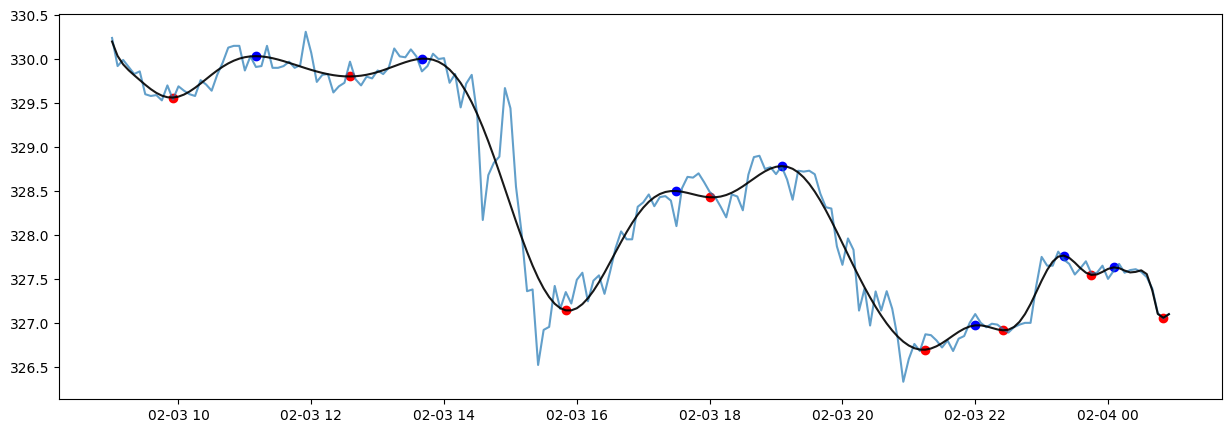

In [34]:
# Plot data
# Plot the stock data and identified minima

plt.figure(figsize=(15, 5))
plt.plot(stock_data.index, stock_data["close"], label='Close Prices', alpha=0.7)

# # Plot polynomial fit

plt.plot(stock_data.index[:min_length], y_polynomial_close, '-', markersize=1.0, color='black', alpha=0.9, label='Polynomial Fit')

# # Plot red dots at local minima and blue dots at local maxima

plt.scatter(stock_data.index[local_poly_minima], y_polynomial_close[local_poly_minima], color='red', label='Local Minima')
plt.scatter(stock_data.index[local_poly_maxima],y_polynomial_close[local_poly_maxima], color="blue", label = "Local Maxima")

In [35]:
# # Define the time independent DF for double top/bottom identification
# # Timestamp remains a column, but can identify pattern from peak to peak immediately

# time_independent_df = []
# time_independent_df = pd.DataFrame(time_independent_df, columns = ["timestamp","close","high","low","trade_count","open","volume","vwap","poly_fit_open","poly_fit_high","poly_fit_low","poly_fit_close","minima","maxima","dbl_top_target","dbl_bot_target"])

# for index, row in islice(updated_stock_data.iterrows(), 0, None):

#     # Assign to rows only those that contain local min or max

#     if (updated_stock_data.at[index,"minima"] == -1):
#         time_independent_df.loc[index] = row
#         a = updated_stock_data.iloc[index]["poly_fit_close"]
#     elif (updated_stock_data.at[index,"maxima"] == 1):
#         time_independent_df.loc[index] = row
#         a = updated_stock_data.iloc[index]["poly_fit_close"]

# # Reset time dependent index
# # Set new time independent index

# time_independent_df.reset_index(inplace = True)
# time_independent_df.rename(columns={"index":"time_dependent_index"}, inplace = True)

# # Data review
        
# display(time_independent_df.head(20))
# print()
# print(row)
# print()
# print(a)
# print(index)
# print()
# print(len(time_independent_df))

In [36]:
# Define the time independent DF for double top/bottom identification
# Timestamp remains a column, but can identify pattern from peak to peak immediately

def time_independent_df(updated_stock_data):

    time_independent_df = []
    time_independent_df = pd.DataFrame(time_independent_df, columns = ["timestamp","close","high","low","trade_count","open","volume","vwap","poly_fit_open","poly_fit_high","poly_fit_low","poly_fit_close","minima","maxima","dbl_top_target","dbl_bot_target"])

    for index, row in islice(updated_stock_data.iterrows(), 0, None):

        # Assign to rows only those that contain local min or max

        if (updated_stock_data.at[index,"minima"] == -1):
            time_independent_df.loc[index] = row
            a = updated_stock_data.iloc[index]["poly_fit_close"]
        elif (updated_stock_data.at[index,"maxima"] == 1):
            time_independent_df.loc[index] = row
            a = updated_stock_data.iloc[index]["poly_fit_close"]

    # Reset time dependent index
    # Set new time independent index

    time_independent_df.reset_index(inplace = True)
    time_independent_df.rename(columns={"index":"time_dependent_index"}, inplace = True)

    return time_independent_df

time_independent_df = time_independent_df(updated_stock_data)

In [37]:
# # Initialize variables to identify double top/bottom patterns
# # Time dependent variable x_0 will always begin at a local min/max which also coincides
# # With the start of a trend into a potential double top/bottom
    
# x_0 = 0

# # Initiation of double top/bottom variable
    
# a = 0

# # First peak/valley of double top/bottom pattern
    
# b = 0

# # Trough/peak of double top/bottom pattern

# c = 0

# # Second peak/vallye of double top/bottom pattern
    
# d = 0

# # Trigger of double top/bottom pattern
    
# e = 0

# # Final time increment to finalize and trigger double top signal
    
# x_f_min = 0
# x_f_max = 0

In [38]:
# # Read through code to identify double top/bottom and assign to target columns.

# for index, row in islice(time_independent_df.iterrows(), 0, len(time_independent_df) - 4):

#     # Check for double top
#     # If found then assigns x_f final time for writing to targets in time dependent dataframe

#     if (time_independent_df.at[index,"minima"] == -1):
#         a = time_independent_df.iloc[index]["poly_fit_close"]
#         b = time_independent_df.iloc[index + 1]["poly_fit_close"]
#         c = time_independent_df.iloc[index + 2]["poly_fit_close"]
#         d = time_independent_df.iloc[index + 3]["poly_fit_close"]
#         e = time_independent_df.iloc[index + 4]["poly_fit_close"]
#         x_0 = time_independent_df.iloc[index]["time_dependent_index"]
#         print(a)
#         print(b)
#         print(c)
#         print(d)
#         print(e)
#         print(x_0)
#         if (time_independent_df.iloc[index + 1]["poly_fit_low"]) < d < (time_independent_df.iloc[index + 1]["poly_fit_high"]) and (e < c):
#             x_f = time_independent_df.iloc[index + 4]["time_dependent_index"]
#             while (x_0 < x_f + 1):
#                 updated_stock_data.at[x_0, "dbl_top_target"] = 1
#                 x_0 = x_0 + 1
#             break

#     # Check for double bottom
#     # If found then assigns x_f final time for writing to targets in time dependent dataframe
            
#     elif (time_independent_df.at[index,"maxima"] == 1):
#         a = time_independent_df.iloc[index]["poly_fit_close"]
#         b = time_independent_df.iloc[index + 1]["poly_fit_close"]
#         c = time_independent_df.iloc[index + 2]["poly_fit_close"]
#         d = time_independent_df.iloc[index + 3]["poly_fit_close"]
#         e = time_independent_df.iloc[index + 4]["poly_fit_close"]
#         x_0 = time_independent_df.iloc[index]["time_dependent_index"] 
#         print(a)
#         print(b)
#         print(c)
#         print(d)
#         print(e)
#         print(x_0)
#         if (time_independent_df.iloc[index+1]["poly_fit_low"] < d < time_independent_df.iloc[index+1]["poly_fit_high"]) and (e > c):
#             x_f_min = time_independent_df.iloc[index + 4]["time_independent_df"]
#             while (x_0 < x_f + 1):
#                 updated_stock_data.at[x_0, "dbl_bot_target"] = 1
#                 x_0 = x_0 + 1
#             break

# print(x_f)



In [39]:
# Function to identify daily double top/bottom patterns
# Inherently there should only be 1 identification of the pattern as it is considered a trend reversal pattern
# The loop will break once the pattern is identified

def identify_double_patterns(time_independent_df, updated_stock_data):

    # Initialize variables to identify double top/bottom patterns
    # Time dependent variable x_0 will always begin at a local min/max which also coincides
    # With the start of a trend into a potential double top/bottom
    
    x_0 = 0

    # Initiation of double top/bottom variable
    
    a = 0

    # First peak/valley of double top/bottom pattern
    
    b = 0

    # Trough/peak of double top/bottom pattern

    c = 0

    # Second peak/vallye of double top/bottom pattern
    
    d = 0

    # Trigger of double top/bottom pattern
    
    e = 0

    # Final time increment to finalize and trigger double top signal
    
    x_f = 0

    # Read through code to identify double top/bottom and assign to target columns.

    for index, row in islice(time_independent_df.iterrows(), 0, len(time_independent_df) - 4):

        # Check for double top
        # If found then assigns x_f final time for writing to targets in time dependent dataframe

        if (time_independent_df.at[index,"minima"] == -1):
            a = time_independent_df.iloc[index]["poly_fit_close"]
            b = time_independent_df.iloc[index + 1]["poly_fit_close"]
            c = time_independent_df.iloc[index + 2]["poly_fit_close"]
            d = time_independent_df.iloc[index + 3]["poly_fit_close"]
            e = time_independent_df.iloc[index + 4]["poly_fit_close"]
            x_0 = time_independent_df.iloc[index]["time_dependent_index"]
            print(a)
            print(b)
            print(c)
            print(d)
            print(e)
            print(x_0)
            if (time_independent_df.iloc[index + 1]["poly_fit_low"]) < d < (time_independent_df.iloc[index + 1]["poly_fit_high"]) and (e < c):
                x_f = time_independent_df.iloc[index + 4]["time_dependent_index"]
                while (x_0 < x_f + 1):
                    updated_stock_data.at[x_0, "dbl_top_target"] = 1
                    x_0 = x_0 + 1
                break

        # Check for double bottom
        # If found then assigns x_f final time for writing to targets in time dependent dataframe
            
        elif (time_independent_df.at[index,"maxima"] == 1):
            a = time_independent_df.iloc[index]["poly_fit_close"]
            b = time_independent_df.iloc[index + 1]["poly_fit_close"]
            c = time_independent_df.iloc[index + 2]["poly_fit_close"]
            d = time_independent_df.iloc[index + 3]["poly_fit_close"]
            e = time_independent_df.iloc[index + 4]["poly_fit_close"]
            x_0 = time_independent_df.iloc[index]["time_dependent_index"] 
            print(a)
            print(b)
            print(c)
            print(d)
            print(e)
            print(x_0)
            if (time_independent_df.iloc[index+1]["poly_fit_low"] < d < time_independent_df.iloc[index+1]["poly_fit_high"]) and (e > c):
                x_f_min = time_independent_df.iloc[index + 4]["time_independent_df"]
                while (x_0 < x_f + 1):
                    updated_stock_data.at[x_0, "dbl_bot_target"] = 1
                    x_0 = x_0 + 1
                break
            
    return updated_stock_data, x_f

updated_stock_data, x_f = identify_double_patterns(time_independent_df,updated_stock_data)

print(x_f)



329.56192294690476
330.0328871367968
329.8020168280941
330.00420951462974
327.14205852205225
11
82


In [40]:
# Data Checking

display(updated_stock_data.head(20))
print(updated_stock_data.loc[x_f])

,timestamp,close,high,low,trade_count,open,volume,vwap,poly_fit_open,poly_fit_high,poly_fit_low,poly_fit_close,minima,maxima,dbl_top_target,dbl_bot_target
0,2021-02-03 09:00:00+00:00,330.24,330.33,330.11,39,330.11,3383,330.227245,330.177624,330.374632,330.050063,330.198897,0,0,0,0
1,2021-02-03 09:05:00+00:00,329.92,330.22,329.88,38,330.22,5358,330.052469,330.068865,330.144171,329.996971,330.035328,0,0,0,0
2,2021-02-03 09:10:00+00:00,329.99,330.07,329.95,15,329.97,2615,329.999281,330.007566,330.038664,329.900990,329.939340,0,0,0,0
3,2021-02-03 09:15:00+00:00,329.91,329.91,329.75,20,329.89,1424,329.869747,329.957581,329.981567,329.798555,329.872629,0,0,0,0
4,2021-02-03 09:20:00+00:00,329.83,329.89,329.71,28,329.87,2871,329.788189,329.902586,329.933501,329.708420,329.815702,0,0,0,0
5,2021-02-03 09:25:00+00:00,329.86,329.94,329.81,21,329.93,3150,329.897730,329.838445,329.878653,329.638111,329.760887,0,0,0,0
6,2021-02-03 09:30:00+00:00,329.60,329.95,329.48,40,329.84,5399,329.733469,329.767793,329.815001,329.588550,329.707333,0,0,0,0
7,2021-02-03 09:35:00+00:00,329.58,329.58,329.51,11,329.51,507,329.542899,329.696320,329.747546,329.557240,329.657574,0,0,0,0
8,2021-02-03 09:40:00+00:00,329.59,329.59,329.59,2,329.59,101,329.589901,329.630364,329.683826,329.540360,329.615267,0,0,0,0
9,2021-02-03 09:45:00+00:00,329.53,329.59,329.53,7,329.59,1340,329.585634,329.575468,329.631148,329.534053,329.583824,0,0,0,0


timestamp         2021-02-03 15:50:00+00:00
close                                327.35
high                                 327.71
low                                   326.7
trade_count                            3663
open                                 327.16
volume                               335504
vwap                             327.173438
poly_fit_open                    327.186919
poly_fit_high                    327.513337
poly_fit_low                     326.850505
poly_fit_close                   327.142059
minima                                   -1
maxima                                    0
dbl_top_target                            1
dbl_bot_target                            0
Name: 82, dtype: object
